In [7]:
import pandas as pd
import pm4py as pm
import os
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
#os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin\\' Uncomment if you use Windows

In [8]:
""" # Leer el archivo Excel
df = pd.read_excel('PTC.xlsx')
print(df.columns)

# Convertir la columna 'Timestamp' al tipo de datos datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filtrar las filas que no contengan la palabra "no
df = df[~df['Timestamp'].astype(str).str.contains('no', case=False)]
# Guardar los cambios en un nuevo archivo o sobrescribir el original
df.to_excel('PTC.xlsx', index=False)  """

Index(['NHC', 'Causa intervención', 'Cirujano', 'Tipo de Protesis',
       'Actividad', 'Timestamp', 'Hora - Formato (Ejemplo: 12:30)',
       'Recursos - Formato (Ejemplo: AntibioticoX;Cama;Habitacion;SalaRayos)',
       'Datos extra', 'Hemoglobina preiq', 'Hemoglobina postiq',
       'Duracion de la intervencion'],
      dtype='object')


In [9]:
file_path_cadera="PTC.csv"
event_log_cadera = pd.read_csv(file_path_cadera,sep=';')
event_log_cadera
#Este es el log de la vía clínica de rodilla

,NHC,Causa intervención,Cirujano,Tipo de Protesis,Actividad,Timestamp,Hora - Formato (Ejemplo: 12:30),Recursos - Formato (Ejemplo: AntibioticoX;Cama;Habitacion;SalaRayos),Datos extra,Hemoglobina preiq,Hemoglobina postiq,Duracion de la intervencion
0,137011,Coxartrosis derecha,Jose Manuel Lasierra Sanroman,Zweymuller-Ecofit,Radiografías / Telemétricas,2022-02-11 00:00:00,NaN,"Sala de rayos, personal, material informatico",NaN,13.1,"12,5",60 min
1,137011,NaN,NaN,NaN,Consentimiento informado,2023-03-01 00:00:00,NaN,"Personal, material",NaN,NaN,NaN,NaN
2,137011,NaN,NaN,NaN,Valoracion preanestesica,2023-03-17 00:00:00,NaN,"Personal, material",NaN,NaN,NaN,NaN
3,137011,NaN,NaN,NaN,Comprobacion anestesia ingreso,2023-05-02 00:00:00,NaN,Personal,NaN,NaN,NaN,NaN
4,137011,NaN,NaN,NaN,Comprobacion Consentimiento,2023-05-02 00:00:00,NaN,Personal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,128245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,128245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,128245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1447,128245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
event_log_cadera = pm.format_dataframe(event_log_cadera, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
start_activities_cadera = pm.get_start_activities(event_log_cadera)
end_activities_cadera = pm.get_end_activities(event_log_cadera)
start_activities_cadera,end_activities_cadera

/var/folders/p3/52tdpv2x1szfs4jr5t3sv1180000gn/T/ipykernel_6804/2391379628.py:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  event_log_cadera = pm.format_dataframe(event_log_cadera, case_id='NHC', activity_key='Actividad', timestamp_key='Timestamp')
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please speci

({'Radiografías / Telemétricas': 25,
  'Consentimiento informado': 17,
  'Valoracion preanestesica': 3},
 {'Entrega de ALTA': 32,
  'Bipedestacion y deambulacion segundo dia': 4,
  'Revision AS primer dia': 2,
  'Solicitud pruebas cruzadas': 2,
  'Dolor segundo dia': 1,
  'Pauta HBPM preiq': 1,
  'HBPM post iq': 1,
  'Tratamiento AB': 1,
  'Sedestacion primer dia': 1})

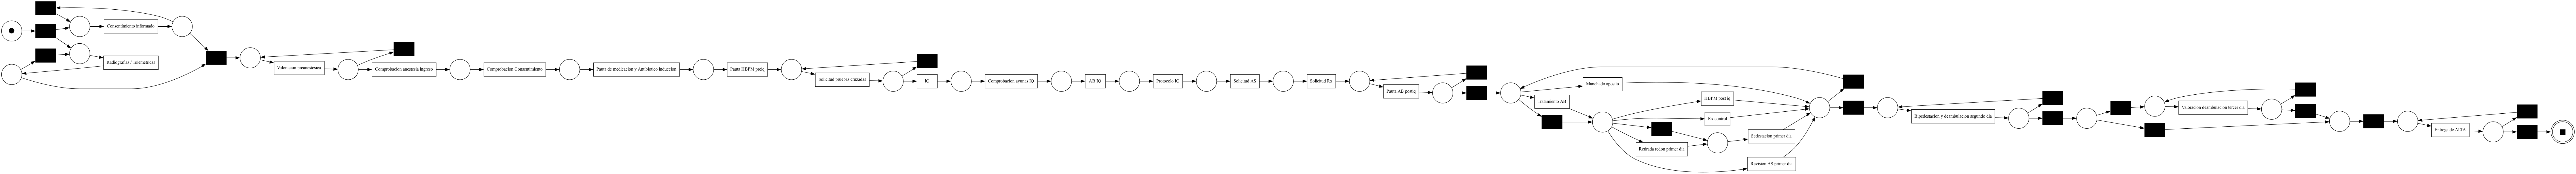

In [21]:
net_i_cadera, im_i_cadera, fm_i_cadera = pm.discover_petri_net_inductive(event_log_cadera, noise_threshold=0.2)
pm.view_petri_net(net_i_cadera, im_i_cadera, fm_i_cadera)

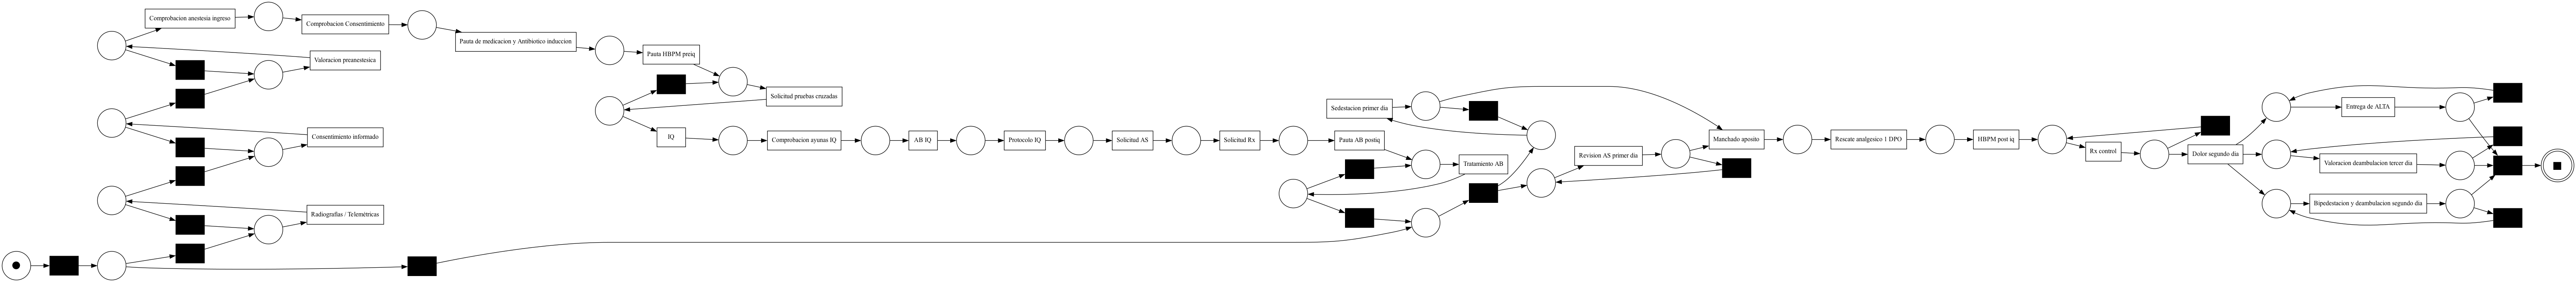

In [27]:
net_i_cadera, im_i_cadera, fm_i_cadera = pm.discover_petri_net_inductive(event_log_cadera, noise_threshold=0.99)
pm.view_petri_net(net_i_cadera, im_i_cadera, fm_i_cadera)

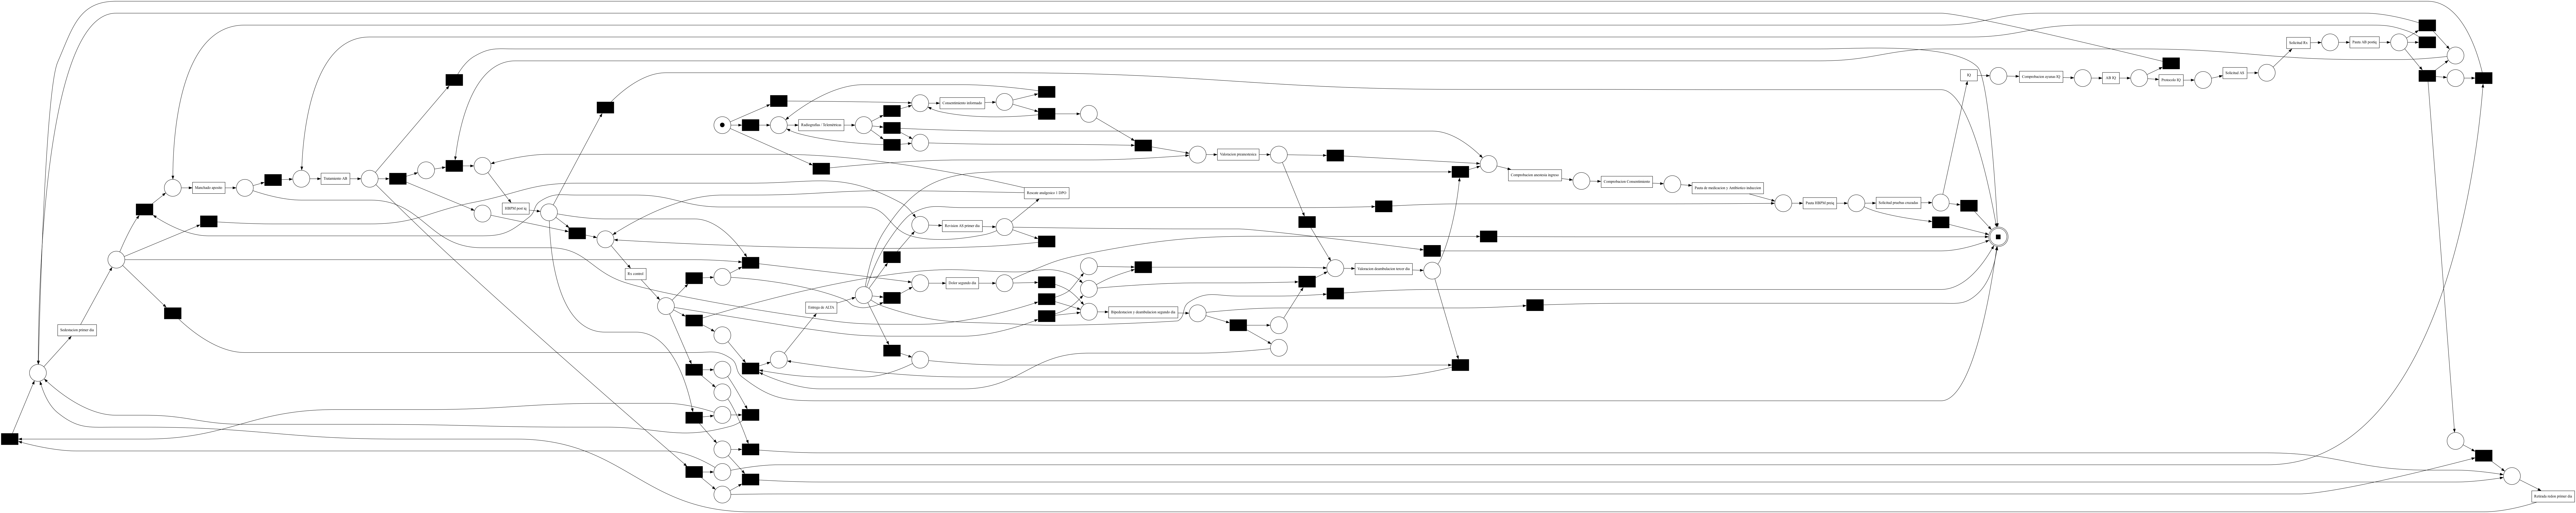

In [16]:
net_h, im_h, fm_h = pm.discover_petri_net_heuristics(event_log_cadera)
pm.view_petri_net(net_h, im_h, fm_h)